In [32]:
import numpy as py
import pandas as pd

import os

In [33]:
path_list = dict()
for dirname, _, filenames in os.walk('D:/code/regression/dataset/mobilePrice'):
    for filename in filenames:
        filename, file_type = os.path.join(dirname, filename), filename.split('.')[0]
        path_list[file_type] = filename
train_df = pd.read_csv(path_list['train'])
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [35]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [36]:
train_df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0, 0.5, 'Category Count')

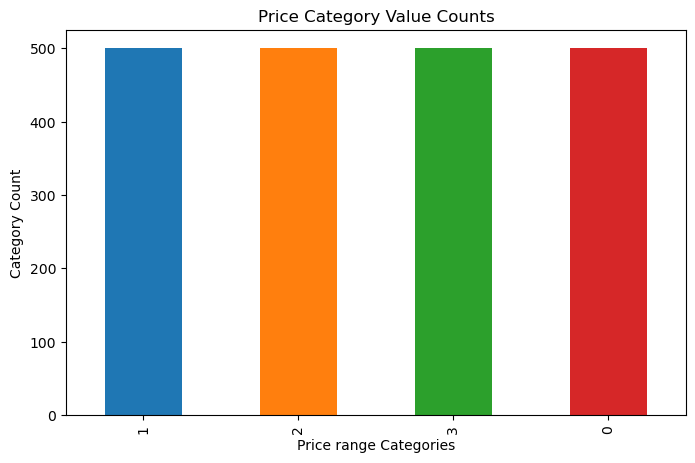

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
train_df['price_range'].value_counts().plot(kind = 'bar', color = sns.color_palette())
plt.title('Price Category Value Counts')
plt.xlabel('Price range Categories')
plt.ylabel('Category Count')

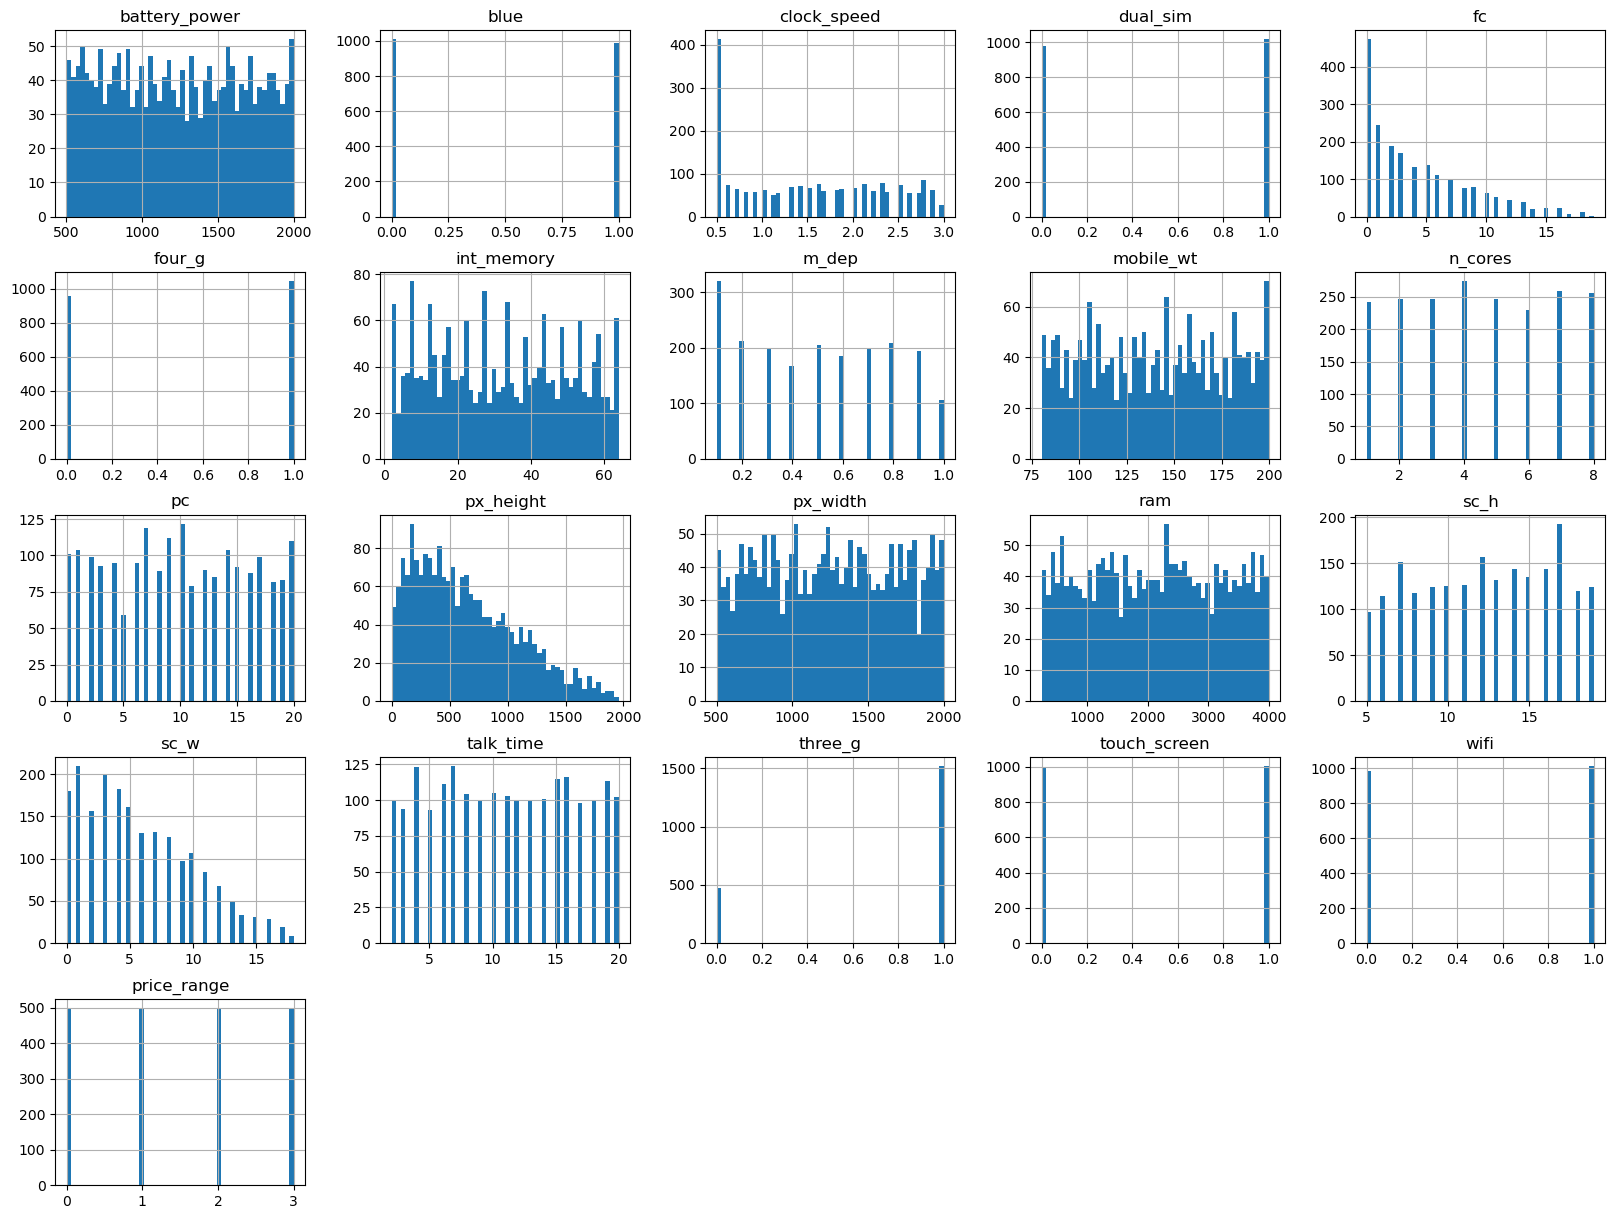

In [38]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

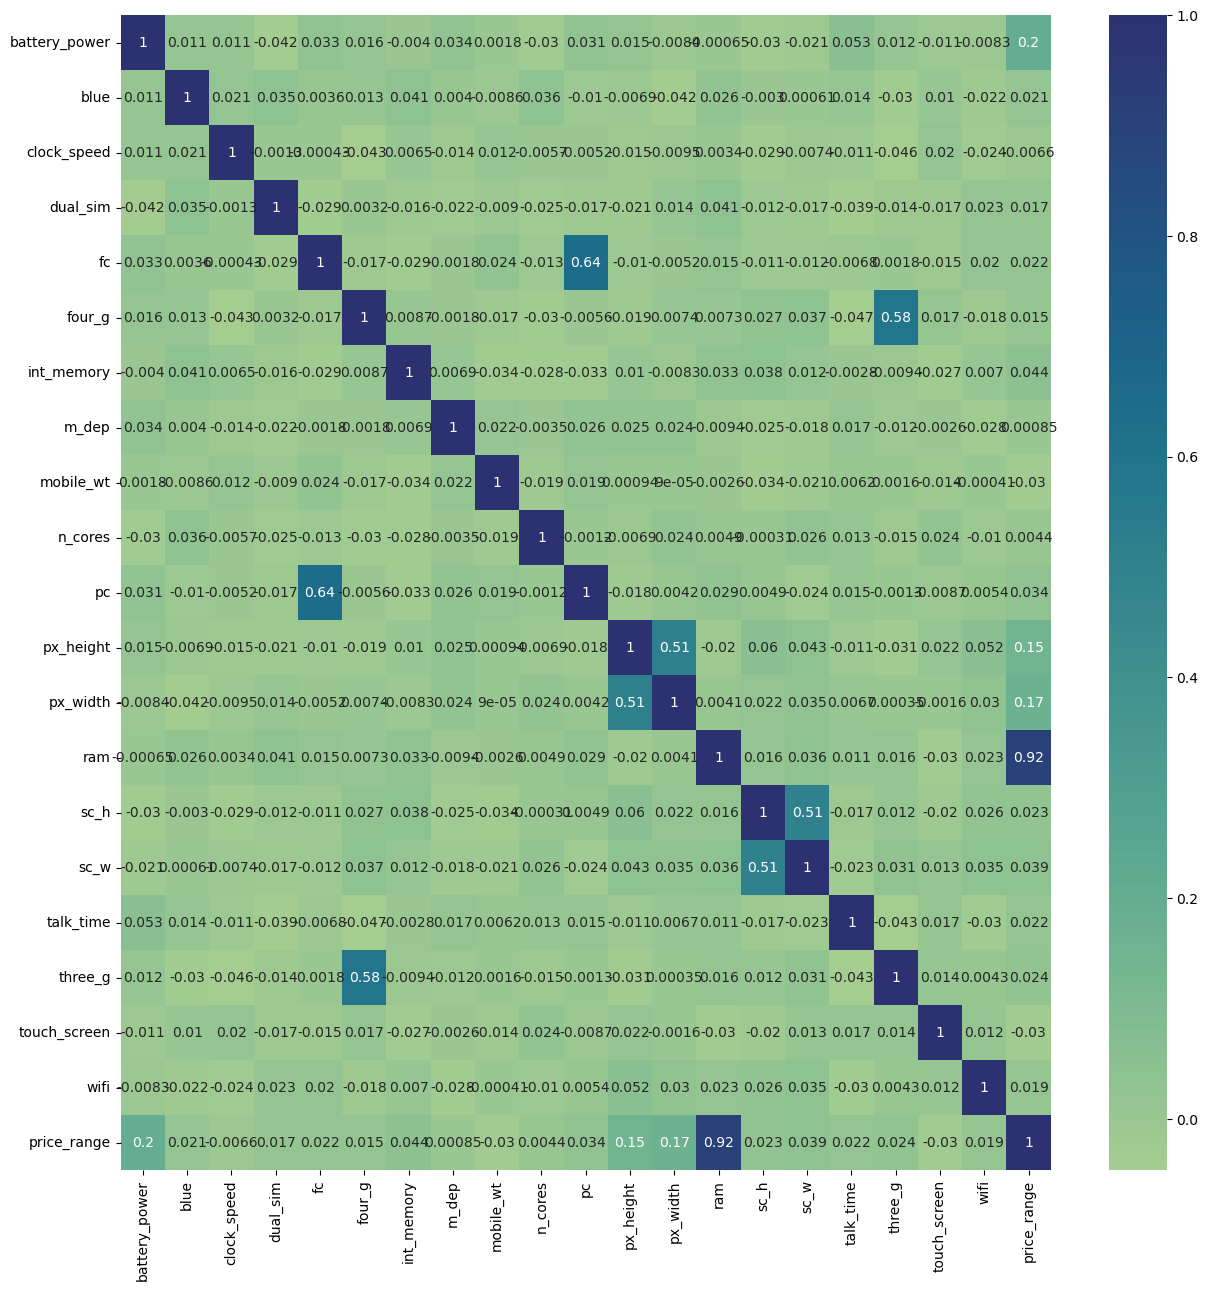

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, cmap="crest")
plt.show()

In [40]:
X = train_df.drop('price_range', axis = 1)
y = train_df['price_range']

In [41]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [70]:
new_X = X.drop(['px_width', 'px_height'], axis = 1)
new_y = y

In [71]:
new_X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0


In [72]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [73]:
new_y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 20) (1600,)
(400, 20) (400,)


In [77]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [78]:
model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim= 20))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 24        
Total params: 549
Trainable params: 549
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [80]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 1.6142 - accuracy: 0.2612 - val_loss: 1.4617 - val_accuracy: 0.2600
Epoch 2/100
50/50 [==============================] - 0s 937us/step - loss: 1.4208 - accuracy: 0.3006 - val_loss: 1.3764 - val_accuracy: 0.2925
Epoch 3/100
50/50 [==============================] - 0s 678us/step - loss: 1.3649 - accuracy: 0.3313 - val_loss: 1.3396 - val_accuracy: 0.3475
Epoch 4/100
50/50 [==============================] - 0s 668us/step - loss: 1.3310 - accuracy: 0.3675 - val_loss: 1.3081 - val_accuracy: 0.3800
Epoch 5/100
50/50 [==============================] - 0s 638us/step - loss: 1.2948 - accuracy: 0.3969 - val_loss: 1.2700 - val_accuracy: 0.4050
Epoch 6/100
50/50 [==============================] - 0s 618us/step - loss: 1.2476 - accuracy: 0.4263 - val_loss: 1.2181 - val_accuracy: 0.4325
Epoch 7/100
50/50 [==============================] - 0s 609us/step - loss: 1.1875 - accuracy: 0.4450 - val_loss: 1.1543 - val_accuracy: 0.4525
E

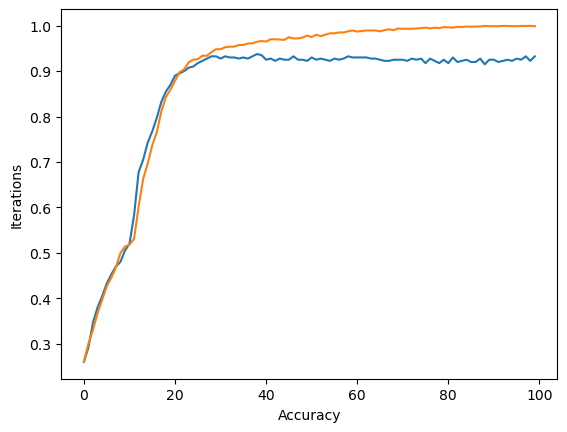

In [81]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

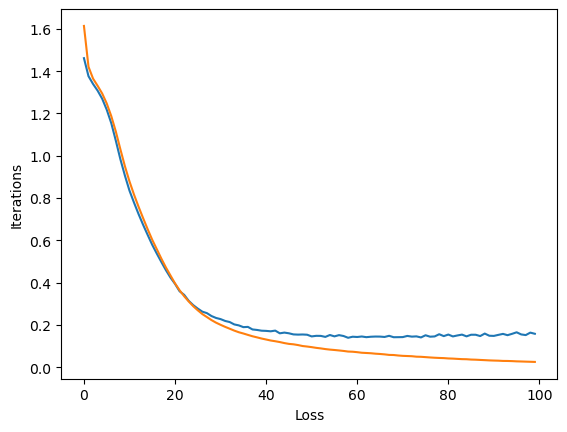

In [82]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results = model.evaluate(X_test, y_test)
results

13/13 [==============================] - 0s 537us/step - loss: 0.1580 - accuracy: 0.9325


[0.1579936444759369, 0.9325000047683716]

In [84]:
from sklearn.preprocessing import StandardScaler

new_sc = StandardScaler()
new_X_scaled = new_sc.fit_transform(new_X)

new_X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, new_y, test_size = 0.20, random_state = 42)

In [86]:
print(X_train.shape, y_train.shape)

(1600, 18) (1600,)


In [87]:
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim= 18))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 18)                342       
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 95        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 24        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [89]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 1.5181 - accuracy: 0.2369 - val_loss: 1.4694 - val_accuracy: 0.2275
Epoch 2/100
50/50 [==============================] - 0s 669us/step - loss: 1.4232 - accuracy: 0.2606 - val_loss: 1.4138 - val_accuracy: 0.2550
Epoch 3/100
50/50 [==============================] - 0s 618us/step - loss: 1.3818 - accuracy: 0.2837 - val_loss: 1.3792 - val_accuracy: 0.2800
Epoch 4/100
50/50 [==============================] - 0s 598us/step - loss: 1.3482 - accuracy: 0.3200 - val_loss: 1.3415 - val_accuracy: 0.3025
Epoch 5/100
50/50 [==============================] - 0s 609us/step - loss: 1.3070 - accuracy: 0.3487 - val_loss: 1.2902 - val_accuracy: 0.3600
Epoch 6/100
50/50 [==============================] - 0s 618us/step - loss: 1.2496 - accuracy: 0.3887 - val_loss: 1.2154 - val_accuracy: 0.4025
Epoch 7/100
50/50 [==============================] - 0s 738us/step - loss: 1.1717 - accuracy: 0.4469 - val_loss: 1.1213 - val_accuracy: 0.4825
E

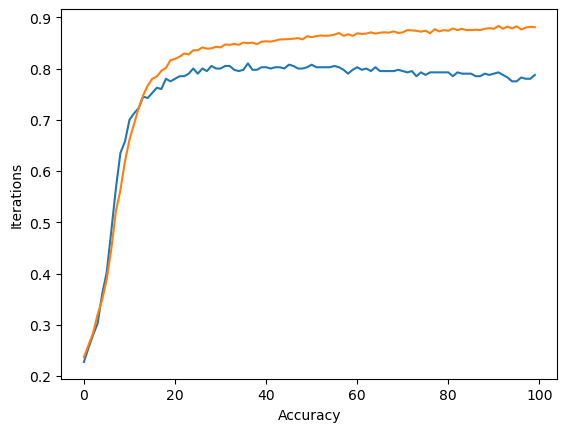

In [90]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

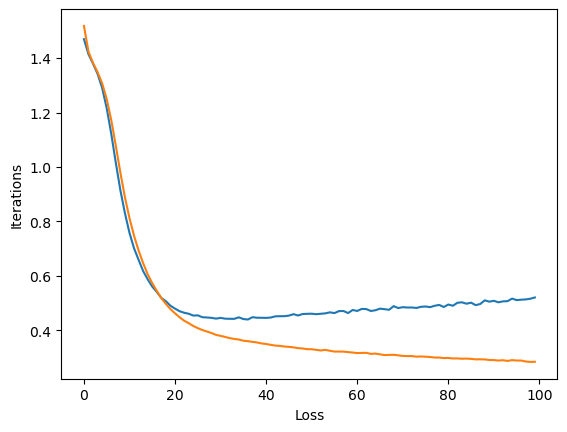

In [91]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

results = model.evaluate(X_test, y_test)
results

13/13 [==============================] - 0s 614us/step - loss: 0.5207 - accuracy: 0.7875


[0.5206645727157593, 0.7875000238418579]